In [126]:
# Importing Data Analysis Librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [127]:

bank = pd.read_csv('/content/Bank Client Deposit Data set Classification.csv')


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [128]:
bank.shape

(45211, 17)

In [129]:
#to check whether that data is balanced or imbalanced
#count the number of instances of each class label
count=bank['y'].value_counts()
#calculating the percentage of instances for each class label
percentage=count/bank.shape[0]*100
#printing the class label counts and percentages
print("Class label counts: \n",count)
print("Class label percentages: \n",percentage)
#determining if the data is balanced or imbalanced
if (percentage[0] < 60 and percentage[1] < 60) or (percentage[0] > 40 and percentage[1] > 40):
    print("The data is balanced")
else:
    print("The data is imbalanced")

Class label counts: 
 no     39922
yes     5289
Name: y, dtype: int64
Class label percentages: 
 no     88.30152
yes    11.69848
Name: y, dtype: float64
The data is imbalanced


In [130]:
# take a look at the type, number of columns, entries, null values etc..
bank.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [131]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [132]:

bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## 1.1. Knowing the categorical variables



In [133]:
# knowing the categorical variables
print('Jobs:\n', bank['job'].unique())

Jobs:
 ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


In [134]:
print('Marital:\n', bank['marital'].unique())

Marital:
 ['married' 'single' 'divorced']


In [135]:
print('Education:\n', bank['education'].unique())

Education:
 ['tertiary' 'secondary' 'unknown' 'primary']


In [136]:
print('Default:\n', bank['default'].unique())
print('Housing:\n', bank['housing'].unique())
print('Loan:\n', bank['loan'].unique())

Default:
 ['no' 'yes']
Housing:
 ['yes' 'no']
Loan:
 ['no' 'yes']


In [137]:
print('Contact:\n', bank['contact'].unique())

Contact:
 ['unknown' 'cellular' 'telephone']


In [138]:
print('Month:\n', bank['month'].unique())

Month:
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


In [139]:
print('Poutcome:\n', bank['poutcome'].unique())

Poutcome:
 ['unknown' 'failure' 'other' 'success']


In [140]:
print('Y:\n', bank['y'].unique())

Y:
 ['no' 'yes']


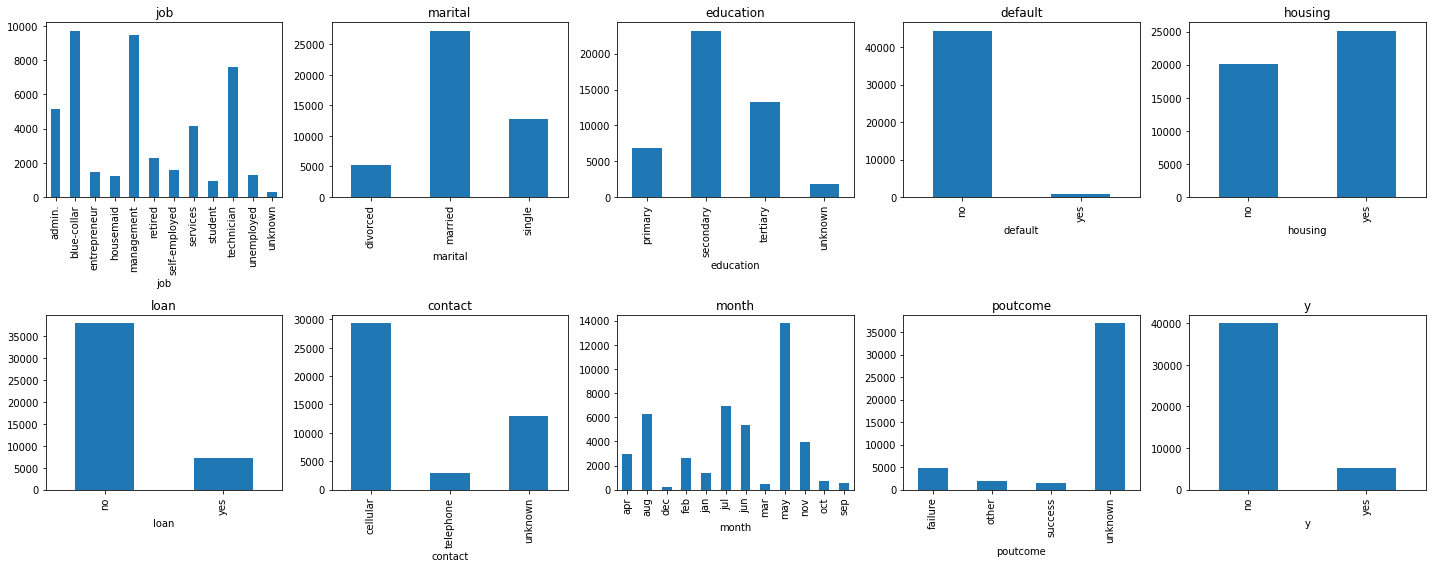

In [141]:
# Select the categorical and numerical features
cat_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
num_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Generate a cross-tabulation table for the categorical features
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
for i, feature in enumerate(cat_features):
    ct = pd.crosstab(index=bank[feature], columns='count')
    ax = axs[i // 5, i % 5]
    ct.plot(kind='bar', legend=None, ax=ax)  # set the color of the bars to blue
    ax.set_title(feature)
plt.tight_layout()
plt.show()


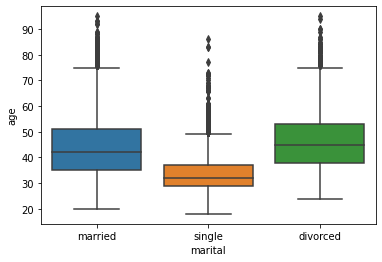

In [144]:
sns.boxplot(data=bank, x='marital', y='age')
plt.show()



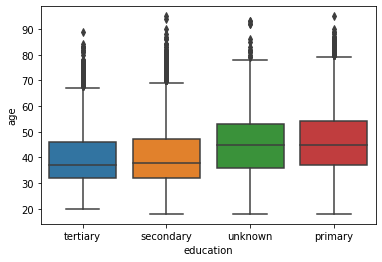

In [145]:
sns.boxplot(data=bank, x='education', y='age')
plt.show()

In [146]:
# Define categorical columns
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# One-hot encode categorical columns
bank = pd.get_dummies(bank, columns=cat_columns)

# Print the modified dataframe
print(bank.head())


   age  balance  day  duration  campaign  pdays  previous   y  job_admin.  \
0   58     2143    5       261         1     -1         0  no           0   
1   44       29    5       151         1     -1         0  no           0   
2   33        2    5        76         1     -1         0  no           0   
3   47     1506    5        92         1     -1         0  no           0   
4   33        1    5       198         1     -1         0  no           0   

   job_blue-collar  ...  month_jun  month_mar  month_may  month_nov  \
0                0  ...          0          0          1          0   
1                0  ...          0          0          1          0   
2                0  ...          0          0          1          0   
3                1  ...          0          0          1          0   
4                0  ...          0          0          1          0   

   month_oct  month_sep  poutcome_failure  poutcome_other  poutcome_success  \
0          0          0        

In [147]:
bank.shape

(45211, 52)

In [148]:
# Define a mapping of label to integer values
label_map = {'no': 0, 'yes': 1}

# Apply label encoding to column 'y'
bank['y'] = bank['y'].apply(lambda x: label_map[x])

# Move the 'y' column to the last position
cols = bank.columns.tolist()
cols.remove('y')
cols.append('y')
bank = bank[cols]

# Print the updated dataframe
print(bank)


       age  balance  day  duration  campaign  pdays  previous  job_admin.  \
0       58     2143    5       261         1     -1         0           0   
1       44       29    5       151         1     -1         0           0   
2       33        2    5        76         1     -1         0           0   
3       47     1506    5        92         1     -1         0           0   
4       33        1    5       198         1     -1         0           0   
...    ...      ...  ...       ...       ...    ...       ...         ...   
45206   51      825   17       977         3     -1         0           0   
45207   71     1729   17       456         2     -1         0           0   
45208   72     5715   17      1127         5    184         3           0   
45209   57      668   17       508         4     -1         0           0   
45210   37     2971   17       361      4552    188        11           0   

       job_blue-collar  job_entrepreneur  ...  month_mar  month_may  \
0   

In [149]:
bank.dtypes

age                    int64
balance                int64
day                    int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
marital_divorced       uint8
marital_married        uint8
marital_single         uint8
education_primary      uint8
education_secondary    uint8
education_tertiary     uint8
education_unknown      uint8
default_no             uint8
default_yes            uint8
housing_no             uint8
housing_yes            uint8
loan_no                uint8
loan_yes               uint8
contact_cellular       uint8
contact_telephone      uint8
contact_unknow

In [150]:
# Calculate Z-scores for each column
z_scores = (bank - bank.mean()) / bank.std()

# Find outliers (|Z-score| > 3)
outliers = np.abs(z_scores) > 3

# Find total number of outliers for each column and in total
total_outliers = outliers.sum()
col_outliers = outliers.sum(axis=0)

print("Total outliers:", total_outliers)
print("Outliers per column:")
for col in bank.columns:
    print(f"{col}: {col_outliers[col]}")

Total outliers: age                     381
balance                 745
day                       0
duration                963
campaign                 20
pdays                  1723
previous                582
job_admin.                0
job_blue-collar           0
job_entrepreneur       1487
job_housemaid          1240
job_management            0
job_retired            2264
job_self-employed      1579
job_services           4154
job_student             938
job_technician            0
job_unemployed         1303
job_unknown             288
marital_divorced          0
marital_married           0
marital_single            0
education_primary         0
education_secondary       0
education_tertiary        0
education_unknown      1857
default_no              815
default_yes             815
housing_no                0
housing_yes               0
loan_no                   0
loan_yes                  0
contact_cellular          0
contact_telephone      2906
contact_unknown           0
mont

In [151]:

# Replace outliers with median value of the corresponding column
for col in bank.columns:
    col_median = bank[col].median()
    bank.loc[outliers[col], col] = col_median

# Verify the number of outliers after replacement
z_scores = (bank - bank.mean()) / bank.std()
outliers = np.abs(z_scores) > 3
total_outliers = outliers.sum()
col_outliers = outliers.sum(axis=0)
print("Total outliers after replacement:", total_outliers)
print("Outliers per column after replacement:")
for col in bank.columns:
    print(f"{col}: {col_outliers[col]}")


Total outliers after replacement: age                     106
balance                1261
day                       0
duration                975
campaign                840
pdays                  1866
previous               1655
job_admin.                0
job_blue-collar           0
job_entrepreneur          0
job_housemaid             0
job_management            0
job_retired               0
job_self-employed         0
job_services              0
job_student               0
job_technician            0
job_unemployed            0
job_unknown               0
marital_divorced          0
marital_married           0
marital_single            0
education_primary         0
education_secondary       0
education_tertiary        0
education_unknown         0
default_no                0
default_yes               0
housing_no                0
housing_yes               0
loan_no                   0
loan_yes                  0
contact_cellular          0
contact_telephone         0
contact_unknow

In [152]:
print(bank)

       age  balance  day  duration  campaign  pdays  previous  job_admin.  \
0       58     2143    5       261         1     -1         0           0   
1       44       29    5       151         1     -1         0           0   
2       33        2    5        76         1     -1         0           0   
3       47     1506    5        92         1     -1         0           0   
4       33        1    5       198         1     -1         0           0   
...    ...      ...  ...       ...       ...    ...       ...         ...   
45206   51      825   17       977         3     -1         0           0   
45207   71     1729   17       456         2     -1         0           0   
45208   72     5715   17       180         5    184         3           0   
45209   57      668   17       508         4     -1         0           0   
45210   37     2971   17       361         2    188         0           0   

       job_blue-collar  job_entrepreneur  ...  month_mar  month_may  \
0   

In [153]:
bank.shape

(45211, 52)

In [154]:
# Select the independent variables
X = bank.iloc[:, :-1]  # all columns except the last two

# Select the dependent variable
y = bank.iloc[:, -1]   # last column only

In [155]:
X=np.array(X) # converting X into numpy array
y=np.array(y) # converting y into numpy array

In [156]:
print(X)

[[  58 2143    5 ...    0    0    1]
 [  44   29    5 ...    0    0    1]
 [  33    2    5 ...    0    0    1]
 ...
 [  72 5715   17 ...    0    0    0]
 [  57  668   17 ...    0    0    1]
 [  37 2971   17 ...    0    0    0]]


In [157]:
print(y)

[0 0 0 ... 1 0 0]


In [158]:
X.shape

(45211, 51)

In [159]:
y.shape

(45211,)

In [160]:

# shuffle the data
np.random.seed(123)
bank = bank.sample(frac=1, random_state=123).reset_index(drop=True)

# define the percentage of data to use for training
train_pct = 0.8

# split the data into training and testing sets
train_data = bank.iloc[:int(len(bank)*train_pct)]
test_data = bank.iloc[int(len(bank)*train_pct):]

# separate the features from the target variable
X_train = train_data.drop(columns=['y'])
y_train = train_data['y']
X_test = test_data.drop(columns=['y'])
y_test = test_data['y']

import math

# Define train-test-split function
def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state:
        np.random.seed(random_state)
    
    n_samples = X.shape[0]
    n_test = int(test_size * n_samples)
    
    shuffled_indices = np.random.permutation(n_samples)
    test_indices = shuffled_indices[:n_test]
    train_indices = shuffled_indices[n_test:]
    
    X_train, y_train = X[train_indices], y[train_indices]
    X_test, y_test = X[test_indices], y[test_indices]
    
    return X_train, X_test, y_train, y_test

# Define KNN classifier
class KNN:
    def __init__(self, k):
        self.k = k
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test):
        y_pred = []
        for x in X_test:
            # Calculate distances between x and all training data points
            distances = []
            for x_train in self.X_train:
                dist = math.sqrt(np.sum((x - x_train) ** 2))
                distances.append(dist)
            
            # Get indices of the k nearest neighbors
            k_indices = np.argsort(distances)[:self.k]
            
            # Get the labels of the k nearest neighbors
            k_labels = [self.y_train[i] for i in k_indices]
            
            # Predict the label of x based on the majority label of k nearest neighbors
            most_common_label = max(set(k_labels), key=k_labels.count)
            y_pred.append(most_common_label)
        
        return np.array(y_pred)

# Define pipeline for KNN classification
class Pipeline:
    def __init__(self, steps):
        self.steps = steps
        
    def fit(self, X_train, y_train):
        for step in self.steps:
            step[1].fit(X_train, y_train)
    
    def predict(self, X_test):
        X_data = X_test
        for step in self.steps:
            X_data = step[1].predict(X_data)
        return X_data


In [161]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define pipeline with KNN classifier
pipe = Pipeline([
    ('knn', KNN(k=5))
])

# Fit pipeline to training data
pipe.fit(X_train, y_train)

# Make predictions on testing data
y_pred = pipe.predict(X_test)


In [162]:
# Calculate accuracy
accuracy = sum(y_pred == y_test) / len(y_test)
print("Accuracy: {:.2f}".format(accuracy))

# Calculate precision
true_positives = sum((y_pred == 1) & (y_test == 1))
false_positives = sum((y_pred == 1) & (y_test == 0))
precision = true_positives / (true_positives + false_positives)
print("Precision: {:.2f}".format(precision))

# Calculate recall
false_negatives = sum((y_pred == 0) & (y_test == 1))
recall = true_positives / (true_positives + false_negatives)
print("Recall: {:.2f}".format(recall))

# Calculate F1 score
f1_score = 2 * (precision * recall) / (precision + recall)
print("F1 Score: {:.2f}".format(f1_score))


Accuracy: 0.87
Precision: 0.40
Recall: 0.19
F1 Score: 0.26
